<img src = 'alex-kotliarskyi-QBpZGqEMsKg-unsplash.jpg'>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , cross_val_score , RepeatedStratifiedKFold , RandomizedSearchCV
from sklearn.preprocessing import RobustScaler , OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix ,roc_auc_score ,roc_curve ,precision_score ,recall_score ,f1_score ,balanced_accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings(action = "ignore")
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option("display.max_columns" , None)

C:\Users\ThinkPad\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Importing Dataset

In [2]:
data = pd.read_csv("Final dataset Attrition.csv")
df = data.copy()
df.head()

Age Attrition BusinessTravel              Department  DistanceFromHome  \
0   37       Yes  Travel_Rarely  Research & Development                 2   
1   21        No  Travel_Rarely  Research & Development                15   
2   45        No  Travel_Rarely  Research & Development                 6   
3   23        No  Travel_Rarely                   Sales                 2   
4   22        No  Travel_Rarely  Research & Development                15   

   Gender  JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
0    Male               2         1  Laboratory Technician                3   
1    Male               3         1     Research Scientist                4   
2    Male               3         3      Research Director                1   
3    Male               3         1   Sales Representative                1   
4  Female               3         1  Laboratory Technician                4   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked OverTime  \
0        Single           2090                   6      Yes   
1        Single           1232                   1       No   
2       Married          13245                   4      Yes   
3      Divorced           2322                   3       No   
4        Single           2871                   1       No   

   PercentSalaryHike  PerformanceRating  StockOptionLevel  TotalWorkingYears  \
0                 15                  3                 0                  7   
1                 14                  3                 0                  0   
2                 14                  3                 0                 17   
3                 13                  3                 1                  3   
4                 15                  3                 0                  1   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      3               0                        0   
1                      6               0                        0   
2                      3               0                        0   
3                      3               0                        0   
4                      5               0                        0   

   YearsWithCurrManager Higher_Education Date_of_Hire  Date_of_termination  \
0                     0       Graduation   21-01-2021                  NaN   
1                     0       Graduation   13-03-2021                  NaN   
2                     0  Post-Graduation   23-01-2021                  NaN   
3                     0              PHD   25-04-2021                  NaN   
4                     0              PHD   14-06-2021                  NaN   

    Status_of_leaving Mode_of_work  Leaves  Absenteeism Work_accident  \
0              Salary       OFFICE       4            2            No   
1       Work Accident          WFH       5            2            No   
2           Dept.Head          WFH       1            3            No   
3       Work Accident       OFFICE       1            0           Yes   
4  Better Opportunity          WFH       5            2            No   

  Source_of_Hire   Job_mode  Unnamed: 32  
0      Job Event   Contract          NaN  
1      Recruiter  Part Time          NaN  
2      Job Event   Contract          NaN  
3      Recruiter   FullTime          NaN  
4      Job Event   Contract          NaN

# Columns' Descriptions
* **Age - The age of the employee**
* **Attrition - Whether the employee has attrited or not**
* **BusinessTravel - Whether the employee used to travel for business or not**
* **Department - Which department the employee was employed under**
* **DistanceFromHome - The distance the employee travels to reach for job on a day to day basis**
* **Gender - Gender of the employee**
* **JobInvolvement - The involvement rating of an employee over the job handled**
* **JobLevel - Level at which the employee is working**
* **JobRole - The roles and resposibilites of the employee**
* **JobSatisfaction - Satisfaction rating of the employee for the job**
* **MaritalStatus - Marital status of the employee**
* **MonthlyIncome - Monthly income of the employees**
* **NumCompaniesWorked - Number of companies the employees has worked for**
* **OverTime - Whether working Overtime or not**
* **PercentSalaryHike - Percentage salary hike since their appointment in the company**
* **PerformanceRating - Performance Rating of an employee**
* **StockOptionLevel - Level of opted for sharing the stock**
* **TotalWorkingYears - Total years worked by the employees**
* **TrainingTimesLastYear - How many trainings the employee has undergone**
* **YearsAtCompany - Years spent at the present organisation**
* **YearsSinceLastPromotion - Time gone in years since last promotion** 
* **YearsWithCurrManager - Years working under he current manager**
* **Higher_Education - Higher education level of the employee**
* **Date_of_Hire - Date of hire of the employee in the current organisation**
* **Status_of_leaving - Reason for leaving the organisation**
* **Mode_of_work - WFH or WFO**
* **Leaves - Total permitted leaves taken by the employee**
* **Absenteeism - Total days absent for the employee**
* **Work_accident - Work accident if any**
* **Source of Hire - Source of Hire**
* **Job_mode - Working Fulltime/ Part time/ Contractual**

# Checking if there are null values in the dataset or not

In [3]:
df.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Higher_Education              0
Date_of_Hire                  0
Date_of_termination        1470
Status_of_leaving             0
Mode_of_work                  0
Leaves                        0
Absenteeism                   0
Work_accident                 0
Source_of_Hire                0
Job_mode

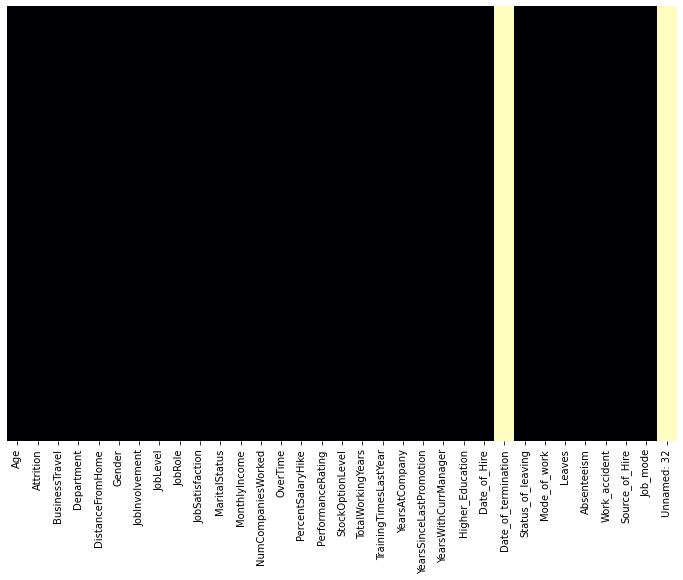

In [4]:
sns.heatmap(data = df.isnull() , cmap = "magma" , yticklabels=False , cbar = False)
plt.show()

# Droped columns which consist of only null values

In [5]:
df.drop(columns = ["Date_of_termination" , "Unnamed: 32"] , inplace = True)

# Checking if there are duplicates in the dataset or not

In [6]:
print(f"There are {df.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


In [7]:
df.head()

Age Attrition BusinessTravel              Department  DistanceFromHome  \
0   37       Yes  Travel_Rarely  Research & Development                 2   
1   21        No  Travel_Rarely  Research & Development                15   
2   45        No  Travel_Rarely  Research & Development                 6   
3   23        No  Travel_Rarely                   Sales                 2   
4   22        No  Travel_Rarely  Research & Development                15   

   Gender  JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
0    Male               2         1  Laboratory Technician                3   
1    Male               3         1     Research Scientist                4   
2    Male               3         3      Research Director                1   
3    Male               3         1   Sales Representative                1   
4  Female               3         1  Laboratory Technician                4   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked OverTime  \
0        Single           2090                   6      Yes   
1        Single           1232                   1       No   
2       Married          13245                   4      Yes   
3      Divorced           2322                   3       No   
4        Single           2871                   1       No   

   PercentSalaryHike  PerformanceRating  StockOptionLevel  TotalWorkingYears  \
0                 15                  3                 0                  7   
1                 14                  3                 0                  0   
2                 14                  3                 0                 17   
3                 13                  3                 1                  3   
4                 15                  3                 0                  1   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      3               0                        0   
1                      6               0                        0   
2                      3               0                        0   
3                      3               0                        0   
4                      5               0                        0   

   YearsWithCurrManager Higher_Education Date_of_Hire   Status_of_leaving  \
0                     0       Graduation   21-01-2021              Salary   
1                     0       Graduation   13-03-2021       Work Accident   
2                     0  Post-Graduation   23-01-2021           Dept.Head   
3                     0              PHD   25-04-2021       Work Accident   
4                     0              PHD   14-06-2021  Better Opportunity   

  Mode_of_work  Leaves  Absenteeism Work_accident Source_of_Hire   Job_mode  
0       OFFICE       4            2            No      Job Event   Contract  
1          WFH       5            2            No      Recruiter  Part Time  
2          WFH       1            3            No      Job Event   Contract  
3       OFFICE       1            0           Yes      Recruiter   FullTime  
4          WFH       5            2            No      Job Event   Contract

# Creating 3 new columns from Date of Hire column

In [8]:
dates = df["Date_of_Hire"].str.split("-" , expand=True)
dates.columns = ["Day" , "Month" , "Year"]
dates

Day Month  Year
0     21    01  2021
1     13    03  2021
2     23    01  2021
3     25    04  2021
4     14    06  2021
...   ..   ...   ...
1465  05    06  1987
1466  20    01  1985
1467  17    02  1985
1468  29    06  1984
1469  08    02  1981

[1470 rows x 3 columns]

# Combining new columns with dataset and converting types to numeric

In [9]:
df.drop(columns = ["Date_of_Hire"] , inplace = True)
df = pd.concat([df , dates] , axis =1)
for x in ["Day" , "Month" , "Year"] : 
    df[x] = df[x].astype("int")

# Education is ordinal variable so I introduced them to dataset as numbers according to the degrees

In [10]:
df["Higher_Education"].unique()

array(['Graduation', 'Post-Graduation', 'PHD', '12th'], dtype=object)

In [11]:
df["Higher_Education"] = df["Higher_Education"].map({"12th" : 0 , "Graduation" : 1 , "Post-Graduation" : 2 , "PHD" : 3})
df["Attrition"] = df["Attrition"].map({"No" : 0 , "Yes" : 1})
df.head()

Age  Attrition BusinessTravel              Department  DistanceFromHome  \
0   37          1  Travel_Rarely  Research & Development                 2   
1   21          0  Travel_Rarely  Research & Development                15   
2   45          0  Travel_Rarely  Research & Development                 6   
3   23          0  Travel_Rarely                   Sales                 2   
4   22          0  Travel_Rarely  Research & Development                15   

   Gender  JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
0    Male               2         1  Laboratory Technician                3   
1    Male               3         1     Research Scientist                4   
2    Male               3         3      Research Director                1   
3    Male               3         1   Sales Representative                1   
4  Female               3         1  Laboratory Technician                4   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked OverTime  \
0        Single           2090                   6      Yes   
1        Single           1232                   1       No   
2       Married          13245                   4      Yes   
3      Divorced           2322                   3       No   
4        Single           2871                   1       No   

   PercentSalaryHike  PerformanceRating  StockOptionLevel  TotalWorkingYears  \
0                 15                  3                 0                  7   
1                 14                  3                 0                  0   
2                 14                  3                 0                 17   
3                 13                  3                 1                  3   
4                 15                  3                 0                  1   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      3               0                        0   
1                      6               0                        0   
2                      3               0                        0   
3                      3               0                        0   
4                      5               0                        0   

   YearsWithCurrManager  Higher_Education   Status_of_leaving Mode_of_work  \
0                     0                 1              Salary       OFFICE   
1                     0                 1       Work Accident          WFH   
2                     0                 2           Dept.Head          WFH   
3                     0                 3       Work Accident       OFFICE   
4                     0                 3  Better Opportunity          WFH   

   Leaves  Absenteeism Work_accident Source_of_Hire   Job_mode  Day  Month  \
0       4            2            No      Job Event   Contract   21      1   
1       5            2            No      Recruiter  Part Time   13      3   
2       1            3            No      Job Event   Contract   23      1   
3       1            0           Yes      Recruiter   FullTime   25      4   
4       5            2            No      Job Event   Contract   14      6   

   Year  
0  2021  
1  2021  
2  2021  
3  2021  
4  2021

# Checking dtypes of variables

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Gender                   1470 non-null   object
 6   JobInvolvement           1470 non-null   int64 
 7   JobLevel                 1470 non-null   int64 
 8   JobRole                  1470 non-null   object
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  NumCompaniesWorked       1470 non-null   int64 
 13  OverTime                 1470 non-null   object
 14  PercentSalaryHike        1470 non-null  

# Attrition by Years with Line Chart

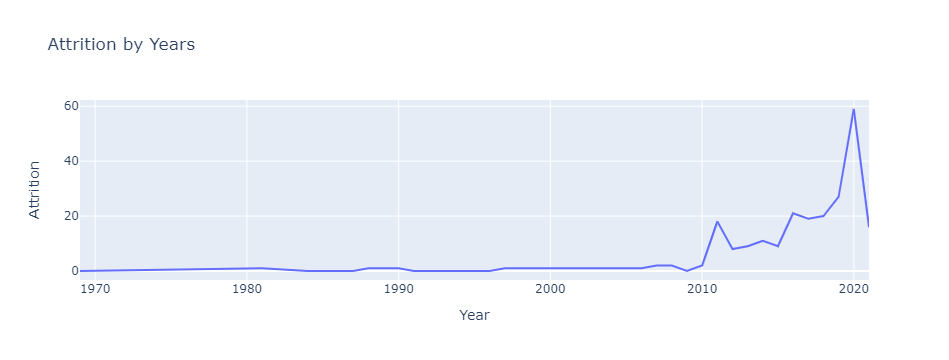

In [13]:
attrition_years = df.groupby(by = "Year")["Attrition"].sum().reset_index()
px.line(data_frame=attrition_years , x = "Year" , y = "Attrition" , title="Attrition by Years")

# Attrition by years with Bar Chart

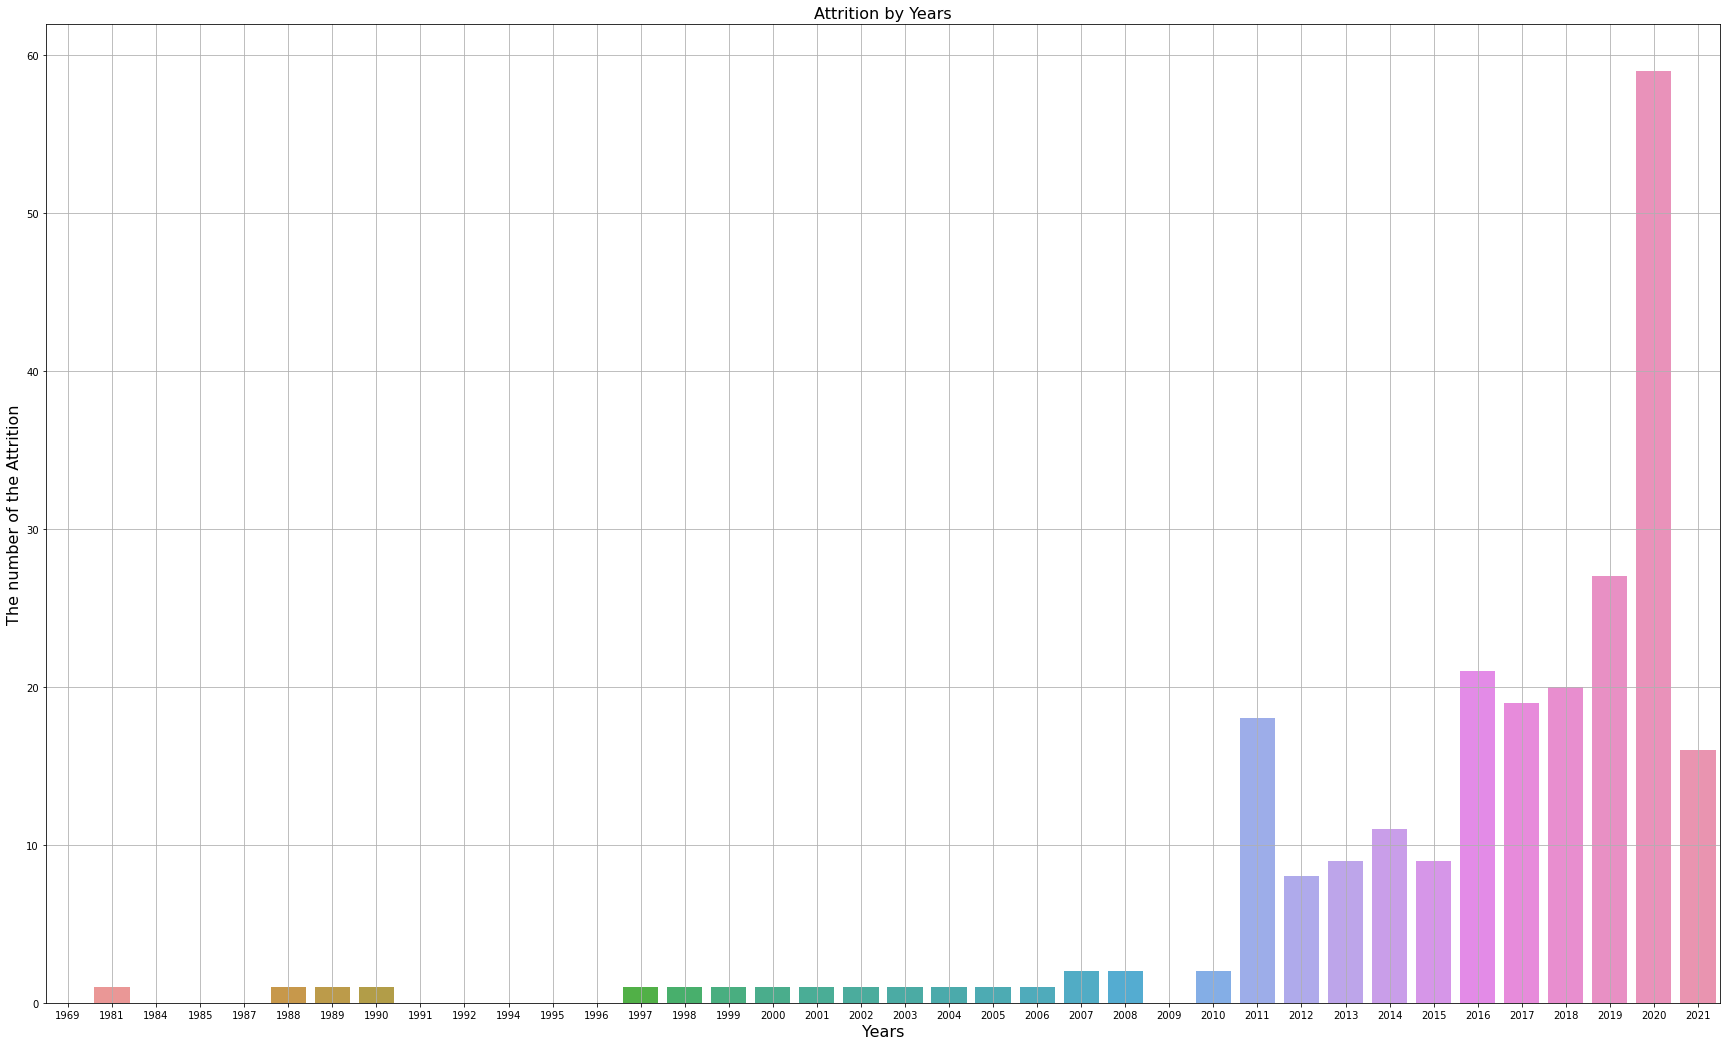

In [14]:
plt.figure(figsize = (30,18))
sns.barplot(data = attrition_years , x = "Year" , y = "Attrition")
plt.title("Attrition by Years" , fontsize = 16)
plt.xlabel("Years" , fontsize = 16)
plt.ylabel("The number of the Attrition" ,fontsize = 16)
plt.grid()
plt.show()

# Attrition by Gender with Pie Chart

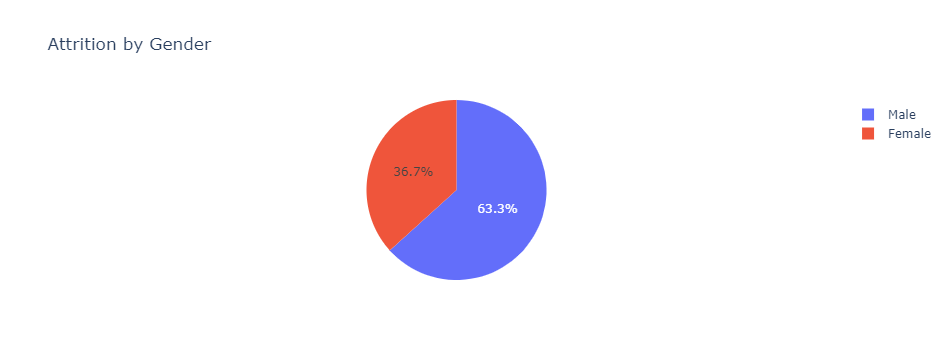

In [15]:
px.pie(data_frame=df , values="Attrition" , names = "Gender" , title="Attrition by Gender")

# The Heatmap of Correlations

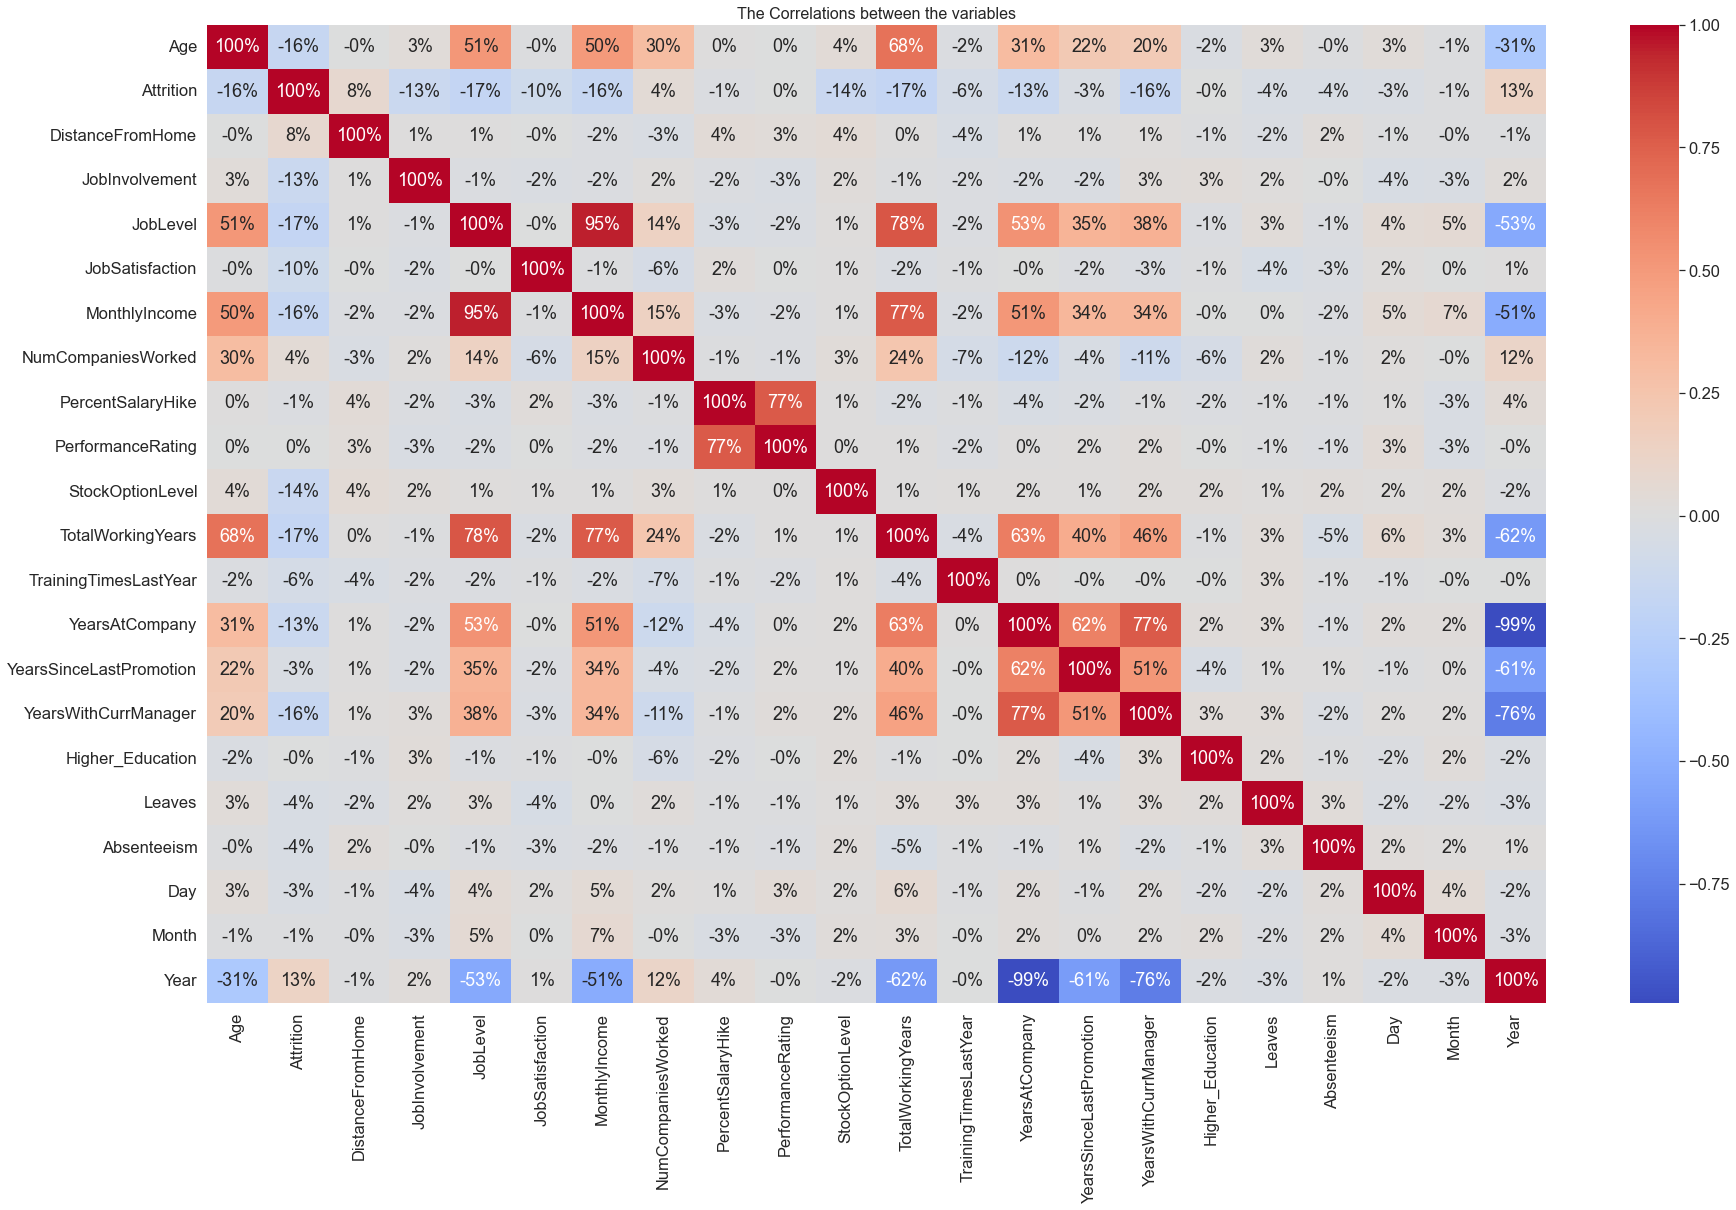

In [16]:
sns.set(font_scale = 1.5 , palette = "bright")
plt.figure(figsize = (30 , 18))
sns.heatmap(data = df.corr() , cmap = plt.cm.coolwarm , annot = True , fmt = ".0%")
plt.title("The Correlations between the variables" , fontsize = 16)
plt.show()

# No perfect multicollinearity assumption

In [17]:
cor = df.drop(columns = "Attrition").corr().abs().unstack().reset_index()
cor = cor.loc[cor["level_0"]!= cor["level_1"]]
multi_col = cor.loc[cor[0] > 0.75 , "level_1"].unique().tolist() 
df_multi = df.copy()  # I will use this assumption for only Logistic Regression that's why I created new dataset
df_multi.drop(columns = multi_col , inplace = True) # Droped multi collinear columns 
df_multi.head()

Age  Attrition BusinessTravel              Department  DistanceFromHome  \
0   37          1  Travel_Rarely  Research & Development                 2   
1   21          0  Travel_Rarely  Research & Development                15   
2   45          0  Travel_Rarely  Research & Development                 6   
3   23          0  Travel_Rarely                   Sales                 2   
4   22          0  Travel_Rarely  Research & Development                15   

   Gender  JobInvolvement                JobRole  JobSatisfaction  \
0    Male               2  Laboratory Technician                3   
1    Male               3     Research Scientist                4   
2    Male               3      Research Director                1   
3    Male               3   Sales Representative                1   
4  Female               3  Laboratory Technician                4   

  MaritalStatus  NumCompaniesWorked OverTime  StockOptionLevel  \
0        Single                   6      Yes                 0   
1        Single                   1       No                 0   
2       Married                   4      Yes                 0   
3      Divorced                   3       No                 1   
4        Single                   1       No                 0   

   TrainingTimesLastYear  YearsSinceLastPromotion  Higher_Education  \
0                      3                        0                 1   
1                      6                        0                 1   
2                      3                        0                 2   
3                      3                        0                 3   
4                      5                        0                 3   

    Status_of_leaving Mode_of_work  Leaves  Absenteeism Work_accident  \
0              Salary       OFFICE       4            2            No   
1       Work Accident          WFH       5            2            No   
2           Dept.Head          WFH       1            3            No   
3       Work Accident       OFFICE       1            0           Yes   
4  Better Opportunity          WFH       5            2            No   

  Source_of_Hire   Job_mode  Day  Month  
0      Job Event   Contract   21      1  
1      Recruiter  Part Time   13      3  
2      Job Event   Contract   23      1  
3      Recruiter   FullTime   25      4  
4      Job Event   Contract   14      6

# Spliting Dataset to X and Y

In [18]:
X = df_multi.drop(columns = ["Attrition"])
y = df_multi["Attrition"]

# Checking if our dataset is balanced or not

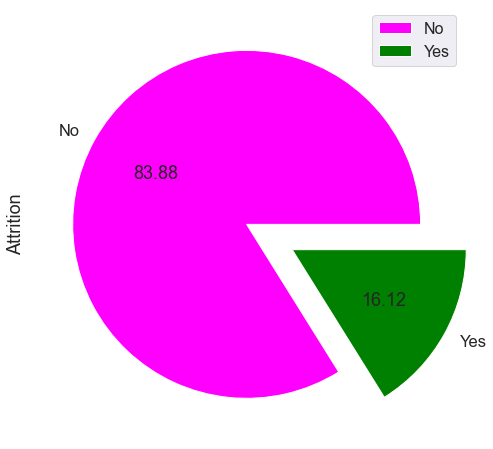

In [19]:
y.value_counts().plot(kind = "pie" , colors = ["magenta" , "green"] ,autopct = "%.2f", explode = [0.0 , 0.3] , labels = ["No" , "Yes"])
plt.legend(loc = "best" , fontsize = 16)
plt.show()

# Spliting dataset to train and test sets

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Automate score, metrics, cross validation, confussion matrix, roc_curve with the help of the functions

In [21]:
def score_function(model_name) : 
    train_score = model_name.score(X_train , y_train)
    test_score = model_name.score(X_test , y_test)
    
    print("The train score is {:.2%}".format(train_score))
    print("The test score is {:.2%}".format(test_score))

In [22]:
def threshold(model_name) :
    recall_scores =  [recall_score(y_true = y_test, y_pred = np.where(model_name.predict_proba(X = X_test)[:, 1] >= proba, 1, 0), pos_label = 1) for proba \
    in np.arange(start = 0.0, stop = 1.01, step = 0.01)]
    precision_scores =  [precision_score(y_true = y_test, y_pred = np.where(model_name.predict_proba(X = X_test)[:, 1] >= proba, 1, 0), pos_label = 1) for proba \
    in np.arange(start = 0.0, stop = 1.01, step = 0.01)]
    plt.plot(np.arange(start = 0.0, stop = 1.01, step = 0.01), recall_scores, label = 'Positive Recall Score', c = 'darkorange')
    plt.plot(np.arange(start = 0.0, stop = 1.01, step = 0.01), precision_scores, label = 'Positive Precision Score', c = 'teal')
    plt.title(label = 'Thresholding for Positive Recall & Precision Score', fontsize = 16)
    plt.axvline(0.5, label = 'Default Threshold', c = 'grey')
    plt.ylabel(ylabel = 'Positive Recall & Precision Score', fontsize = 16)
    plt.xlabel(xlabel = 'Probabilities', fontsize = 16)
    plt.legend(loc = 'best', fontsize = 16)
    plt.grid()
    plt.show()

In [23]:
def metrics_function(model_name , y_pred) :     
    roc = roc_auc_score(y_test , y_pred)
    gini = (2*roc) - 1
    f1 = f1_score(y_test , y_pred)
    balance = balanced_accuracy_score(y_test , y_pred)
    prec = precision_score(y_test , y_pred)
    rec = recall_score(y_test , y_pred)
    
    print("The Roc auc score is {:.2%}".format(roc))
    print("The Gini score is {:.2%}".format(gini))
    print("The F1 score is {:.2%}".format(f1))
    print("The Balance Accuracy Score is {:.2%}".format(balance))
    print("The precission score is {:.2%}".format(prec))
    print("The recall score is {:.2%}".format(rec))

In [24]:
def roc_cruve_function(model_name) :
    fpr , tpr, _ = roc_curve(y_true = y_test , y_score = model_name.predict_proba(X_test)[:,1])
    plt.plot(fpr , tpr, label = "Our Model")
    plt.plot([0,1] , [0,1] , label = "Random Model")
    plt.title("The Roc Curve" , fontsize = 16)
    plt.ylabel("True Positive Rate" , fontsize = 16)
    plt.xlabel("False Positive Rate" , fontsize = 16)
    plt.grid()
    plt.legend(loc = "best" , fontsize = 16)
    plt.show()

In [25]:
def confission_function(model_name , y_pred_trian , y_pred_test) : 
    
    cm_train = confusion_matrix(y_train , y_pred_train)
    cm_test = confusion_matrix(y_test , y_pred_test)
    
    plt.figure(figsize = (30,18))
    plt.subplot(2,3,1)
    sns.heatmap(data = cm_train , cbar = False, annot = True , fmt = ".5g" , cmap = plt.cm.Blues , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"])
    plt.title("Confussion Matrix for Train set" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)
    
    plt.subplot(2,3,2)
    upper_stack = cm_train[0]/np.sum(cm_train , axis = 1)[0]
    lower_stack = cm_train[1]/np.sum(cm_train , axis = 1)[1]
    final_stack = np.vstack([upper_stack , lower_stack])
    sns.heatmap(data = final_stack , cbar = False, annot = True , fmt = ".0%" , cmap = plt.cm.Blues , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"])
    plt.title("Confussion Matrix for Train set with Recall Ratio" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)
    
    plt.subplot(2,3,3)
    left_stack = cm_train[:,0]/np.sum(cm_train , axis = 0)[0]
    right_stack = cm_train[:,1]/np.sum(cm_train , axis = 0)[1]
    result = np.stack([left_stack , right_stack])
    sns.heatmap(data = final_stack , cbar = False, annot = True , fmt = ".0%" , cmap = plt.cm.Blues , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"])
    plt.title("Confussion Matrix for Train set with Precission Ratio" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)
    
    plt.subplot(2,3,4)
    sns.heatmap(data = cm_test , cbar = False, annot = True , fmt = ".5g" , cmap = plt.cm.Blues , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"])
    plt.title("Confussion Matrix for Test set" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)
    
    plt.subplot(2,3,5)
    upper_stack = cm_test[0]/np.sum(cm_test , axis = 1)[0]
    lower_stack = cm_test[1]/np.sum(cm_test , axis = 1)[1]
    final_stack = np.vstack([upper_stack , lower_stack])
    sns.heatmap(data = final_stack , cbar = False, annot = True , fmt = ".0%" , cmap = plt.cm.Blues , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"])
    plt.title("Confussion Matrix for Test set with Recall Ratio" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)
    
    plt.subplot(2,3,6)
    left_stack = cm_test[:,0]/np.sum(cm_test , axis = 0)[0]
    right_stack = cm_test[:,1]/np.sum(cm_test , axis = 0)[1]
    result = np.stack([left_stack , right_stack])
    sns.heatmap(data = final_stack , cbar = False, annot = True , fmt = ".0%" , cmap = plt.cm.Blues , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"])
    plt.title("Confussion Matrix for Train set with Precission Ratio" , fontsize = 20)
    plt.ylabel("The Ground Truth" , fontsize = 18)
    plt.xlabel("The Predictions" , fontsize = 18)

In [26]:
def cross_function(model_name) : 
    cr = cross_val_score(estimator=model_name , X = X_train , y = y_train , scoring="accuracy" , 
                         cv = 10 , n_jobs=-1)
    
    max_score = np.argmax(cr)
    min_score = np.argmin(cr)
    average_score = np.mean(cr)
    
    print("The maxsimum score for this model can be {:.2%}".format(cr[max_score]))
    print("The minumum score for this model can be {:.2%}".format(cr[min_score]))
    print("The average score of cross validation is {:.2%}".format(average_score))

# Making dataset to be ready for Modeling

In [27]:
num_columns = [x for x in X_train.select_dtypes(include="number").columns.to_list() if x !="Higher_Education"]
str_columns = [x for x in X_train.select_dtypes(exclude="number").columns.to_list()]
ordinal_columns = ["Higher_Education"]

In [28]:
pipe_num = make_pipeline((SimpleImputer(missing_values=np.nan , strategy="median")) , (RobustScaler()))
pipe_str = make_pipeline((SimpleImputer(missing_values=np.nan , strategy="most_frequent")) ,(OneHotEncoder(handle_unknown="ignore")))
pipe_or = make_pipeline((SimpleImputer(missing_values=np.nan , strategy="most_frequent")))

In [29]:
transformer = make_column_transformer((pipe_num , num_columns),
               (pipe_str , str_columns),
               (pipe_or , ordinal_columns))

# Logistic Regression

In [30]:
model_log = make_pipeline(transformer , 
            SequentialFeatureSelector(estimator=LogisticRegression() , scoring="accuracy" , cv = RepeatedStratifiedKFold(n_repeats=2) ,n_jobs=-1),
                          LogisticRegression())
model_log.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'NumCompaniesWorked',
                                                   'StockOptionLevel',
                                                   'TrainingTimesLastYear',
                                                   'YearsSinceLastPromotion',
                            

# Score function for Logistic Regression

In [31]:
score_function(model_log)

The train score is 86.39%
The test score is 85.37%


# Applying Thresholding method

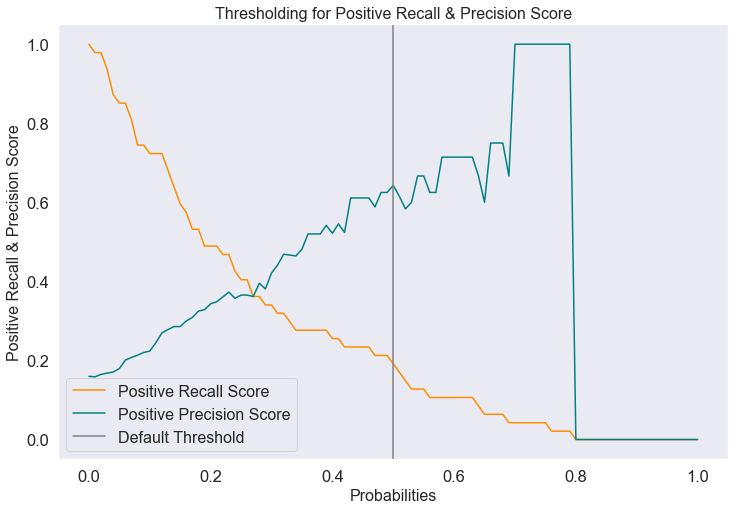

In [32]:
threshold(model_log)

# Increasing Positive Recal in Test set

In [33]:
y_pred_test = np.where(model_log.predict_proba(X_test)[:,1]>=0.15, 1 ,0)
print(classification_report(y_test , y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       247
           1       0.29      0.60      0.39        47

    accuracy                           0.70       294
   macro avg       0.59      0.66      0.59       294
weighted avg       0.80      0.70      0.73       294



# Increasing Positive Recall in Train set

In [34]:
y_pred_train = np.where(model_log.predict_proba(X_train)[:,1] >= 0.16 , 1,0)
print(classification_report(y_train , y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81       986
           1       0.33      0.73      0.45       190

    accuracy                           0.71      1176
   macro avg       0.63      0.72      0.63      1176
weighted avg       0.83      0.71      0.75      1176



# Metrics for Logistic Regression

In [35]:
metrics_function(model_log , y_pred_test)

The Roc auc score is 65.62%
The Gini score is 31.23%
The F1 score is 38.62%
The Balance Accuracy Score is 65.62%
The precission score is 28.57%
The recall score is 59.57%


# Cross Validation for Logistic Regression

In [36]:
cross_function(model_name = model_log)

The maxsimum score for this model can be 91.53%
The minumum score for this model can be 82.05%
The average score of cross validation is 86.13%


# Confussion Matrices for Logistic Regression

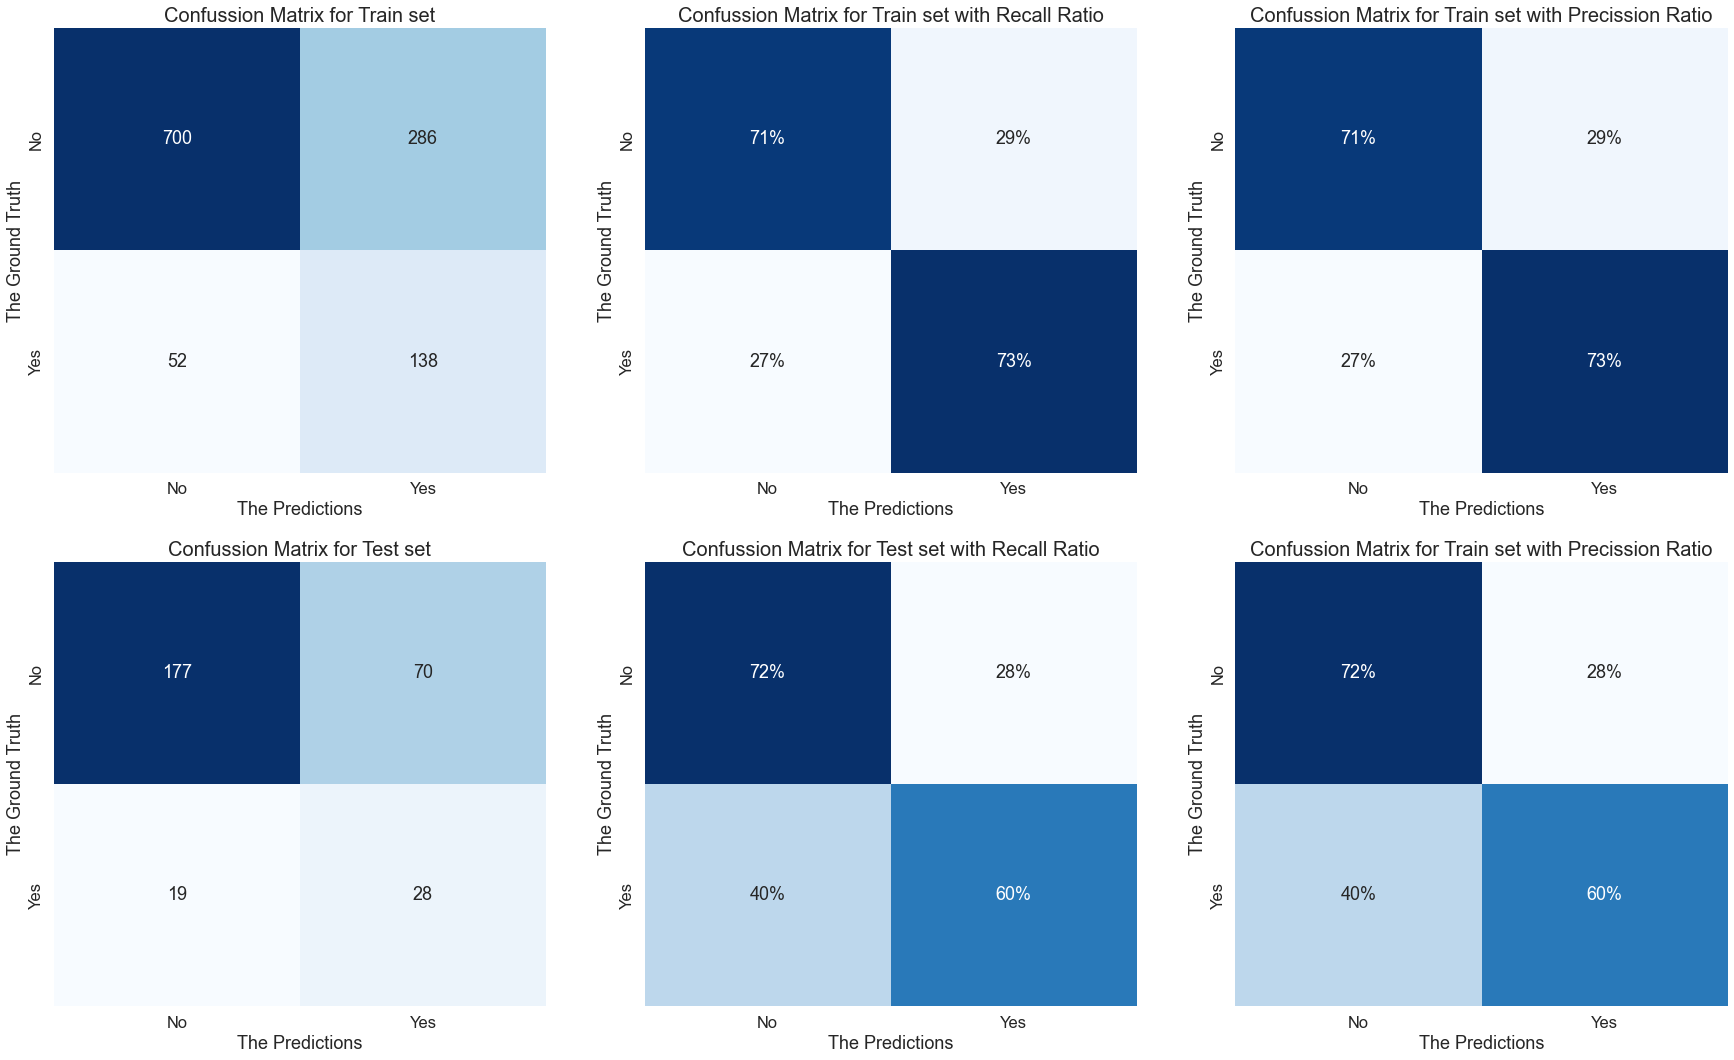

In [37]:
confission_function(model_name=model_log , y_pred_trian=y_pred_train , y_pred_test=y_pred_test)

# Roc Curve for Logistic Regression

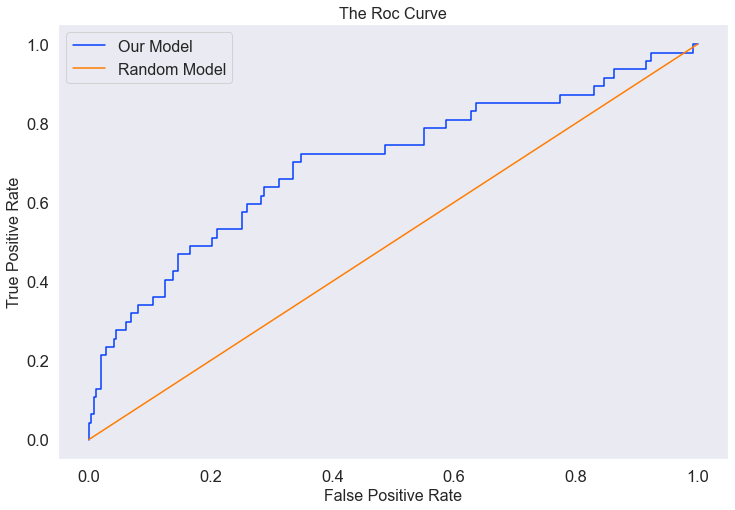

In [38]:
roc_cruve_function(model_log)

# XGBClassifier

In [39]:
# I won't apply no perfect multicollinearity assumption to other algorithms
X = df.drop(columns = ["Attrition"])
y = df["Attrition"]
# That's why I will split main dataset to test and train set

# Splitting dataset to train and test set

In [40]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Making dataset to be ready for Modeling

In [41]:
num_columns = [x for x in X_train.select_dtypes(include="number").columns.to_list() if x !="Higher_Education"]
str_columns = [x for x in X_train.select_dtypes(exclude="number").columns.to_list()]
ordinal_columns = ["Higher_Education"]

In [42]:
pipe_num = make_pipeline((SimpleImputer(missing_values=np.nan , strategy="median")) , (RobustScaler()))
pipe_str = make_pipeline((SimpleImputer(missing_values=np.nan , strategy="most_frequent")) ,(OneHotEncoder(handle_unknown="ignore")))
pipe_or = make_pipeline((SimpleImputer(missing_values=np.nan , strategy="most_frequent")))

In [43]:
transformer = make_column_transformer((pipe_num , num_columns),
               (pipe_str , str_columns),
               (pipe_or , ordinal_columns))

# Modeling

In [44]:
model_xg = make_pipeline(transformer ,
           SequentialFeatureSelector(estimator=XGBClassifier() , scoring="accuracy" , cv = 10 , n_jobs=-1),
            XGBClassifier(subsample = 0.5 , scale_pos_weight = len(y.loc[y==0])/len(y.loc[y==1])))
model_xg.fit(X_train , y_train)

[10:28:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                             

# Score for XGBClassifier

In [45]:
score_function(model_xg)

The train score is 100.00%
The test score is 82.31%


# Cross Validation for XGBClassifier

In [46]:
cross_function(model_name = model_xg)

The maxsimum score for this model can be 87.18%
The minumum score for this model can be 77.97%
The average score of cross validation is 81.89%


# Applying Thresholding method

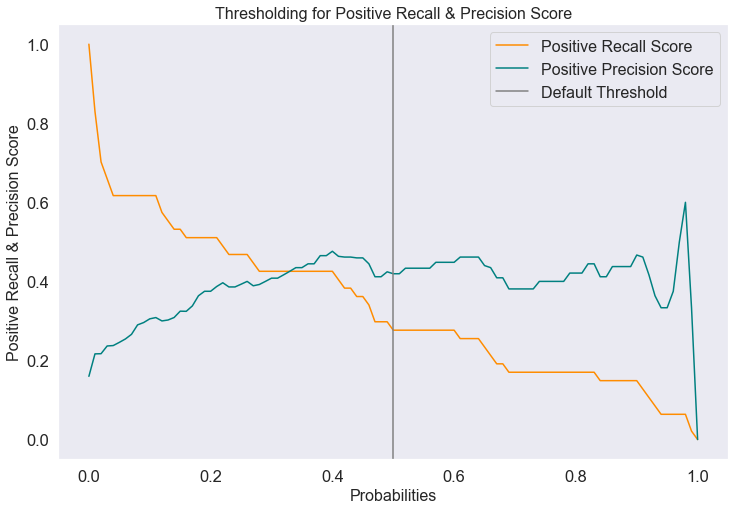

In [47]:
threshold(model_name = model_xg)

# Increasing Positive Recall in test set

In [53]:
y_pred_test = np.where(model_xg.predict_proba(X_test)[:,1]>0.05 , 1,0)
print(classification_report(y_test , y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75       247
           1       0.25      0.62      0.35        47

    accuracy                           0.64       294
   macro avg       0.57      0.63      0.55       294
weighted avg       0.79      0.64      0.68       294



# Increasing Positive Recall in train set

In [55]:
y_pred_train = np.where(model_xg.predict_proba(X_train)[:,1]>0.15 , 1,0)
print(classification_report(y_train , y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       986
           1       0.81      1.00      0.90       190

    accuracy                           0.96      1176
   macro avg       0.91      0.98      0.94      1176
weighted avg       0.97      0.96      0.96      1176



# Confussion Matrices for XGBClassifier

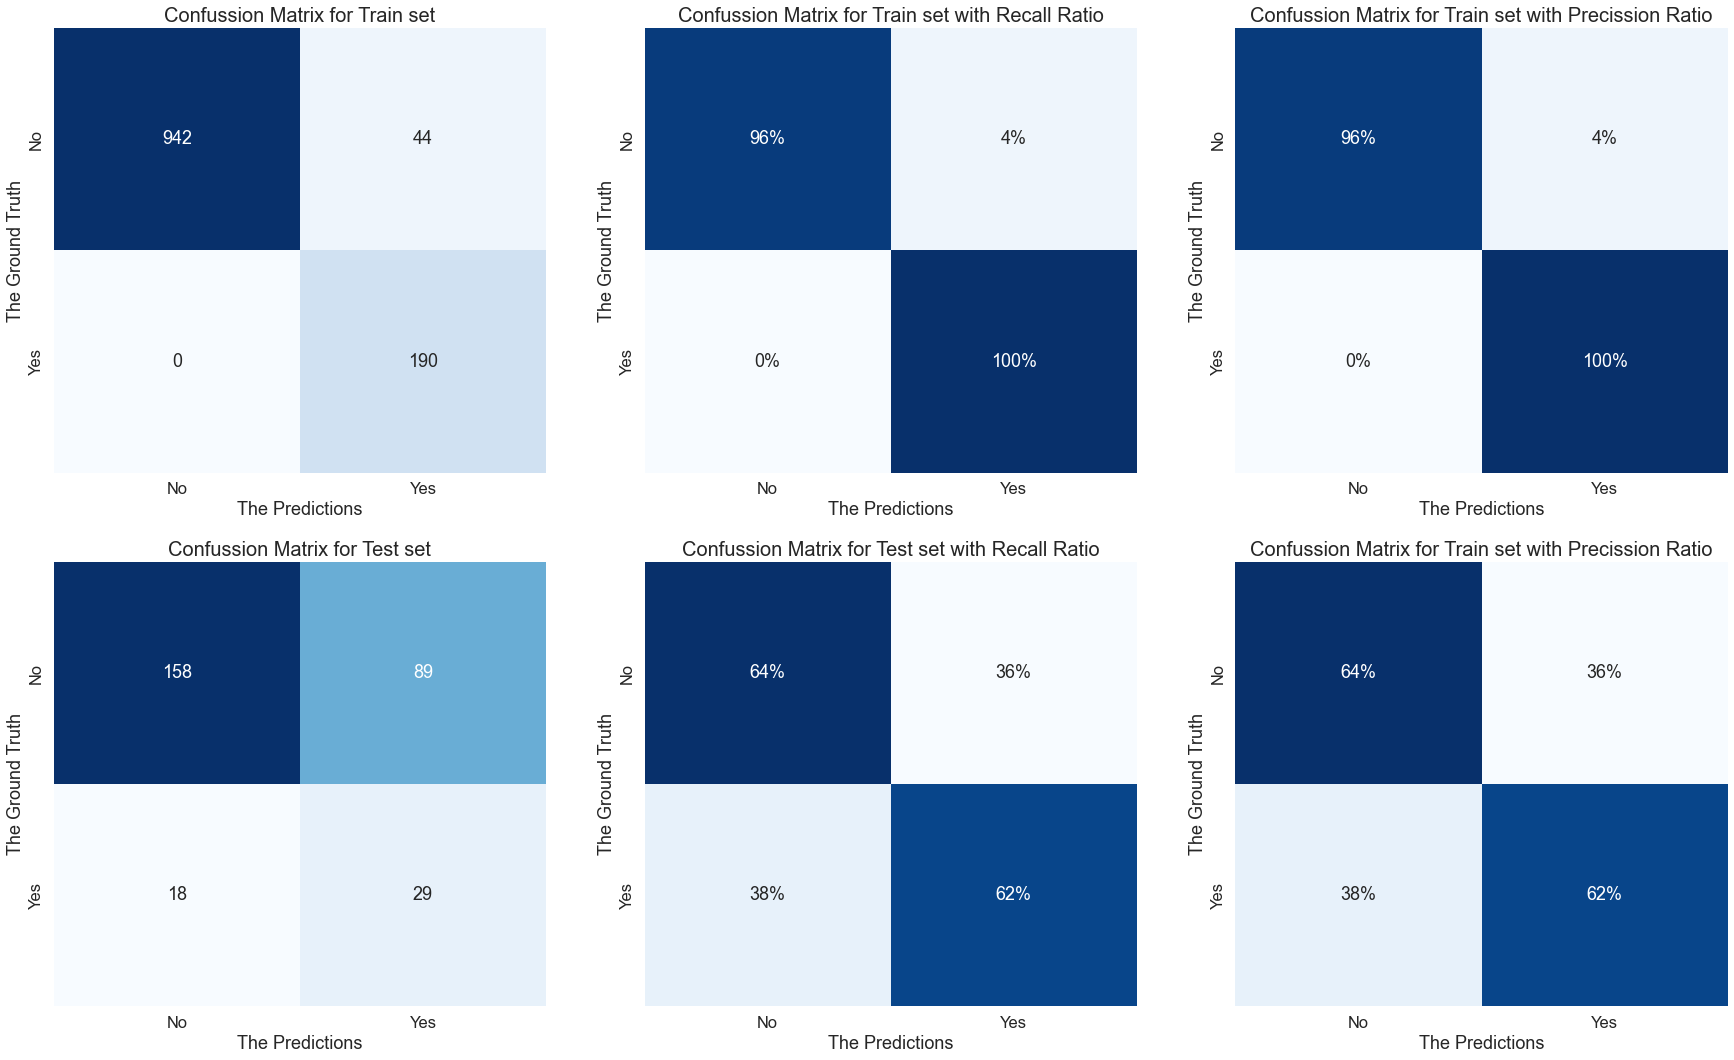

In [56]:
confission_function(model_name = model_xg , y_pred_trian=y_pred_train , y_pred_test=y_pred_test)

# Metrics for XGBClassifier

In [57]:
metrics_function(model_name = model_xg , y_pred = y_pred_test)

The Roc auc score is 62.83%
The Gini score is 25.67%
The F1 score is 35.15%
The Balance Accuracy Score is 62.83%
The precission score is 24.58%
The recall score is 61.70%


# Roc Curve for XGBClassifier

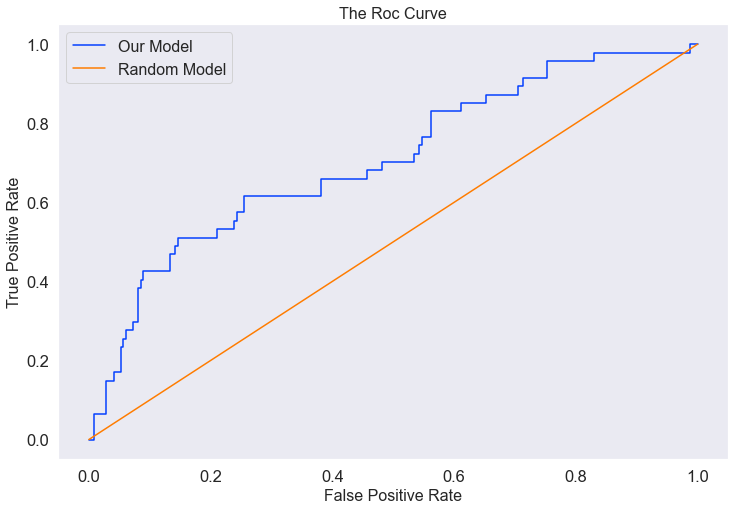

In [58]:
roc_cruve_function(model_name = model_xg)

# Saving model and data for Streamlit application

In [59]:
import pickle

file_name = "Attrition"
pickle.dump(model_log , open(file_name , "wb"))
pickle.dump(df_multi , open("Attrition_data" , "wb"))